4.9 Intro to Data Visualization with Python (exercise portion)

In [5]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [6]:
##Importing path, and csv files of products

path= r'/Users/erictam/Downloads/CareerFoundry Program/Data Immersion Achievement 4/Instacart Basket Analysis'

# To import 4.8 ords_prods_merged part B.pkl as ords_prods_merge

ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4.8 ords_prods_merged part B.pkl'))
ords_prods_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_time_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,prices,price_range_loc,Busiest_day,busiest_period_of_day,max_order,loyalty_flag,Avg_Spent,spender_type,median_order_frequency,frequency_flag
0,2539329,1,1,2,8,11.114836,196,1,0,Soda,...,9.0,Mid-range product,Regularly Busy,Average orders,10,New customer,6.367797,Low Spender,20.0,Regular customer
1,2539329,1,1,2,8,11.114836,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,12.5,Mid-range product,Regularly Busy,Average orders,10,New customer,6.367797,Low Spender,20.0,Regular customer
2,2539329,1,1,2,8,11.114836,12427,3,0,Original Beef Jerky,...,4.4,Low-range product,Regularly Busy,Average orders,10,New customer,6.367797,Low Spender,20.0,Regular customer
3,2539329,1,1,2,8,11.114836,26088,4,0,Aged White Cheddar Popcorn,...,4.7,Low-range product,Regularly Busy,Average orders,10,New customer,6.367797,Low Spender,20.0,Regular customer
4,2539329,1,1,2,8,11.114836,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,1.0,Low-range product,Regularly Busy,Average orders,10,New customer,6.367797,Low Spender,20.0,Regular customer


## Creating Bar Charts

<Axes: xlabel='orders_day_of_week'>

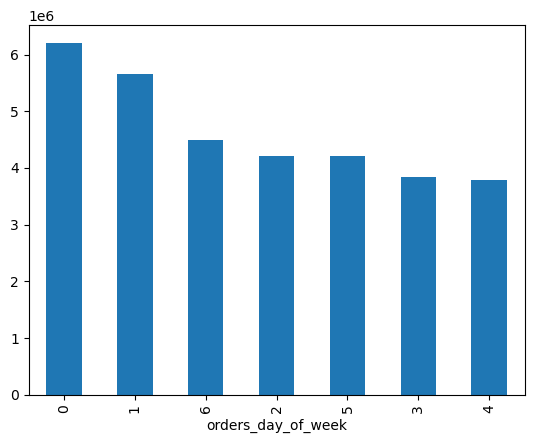

In [8]:
## Chart for orders_day_of_week

ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

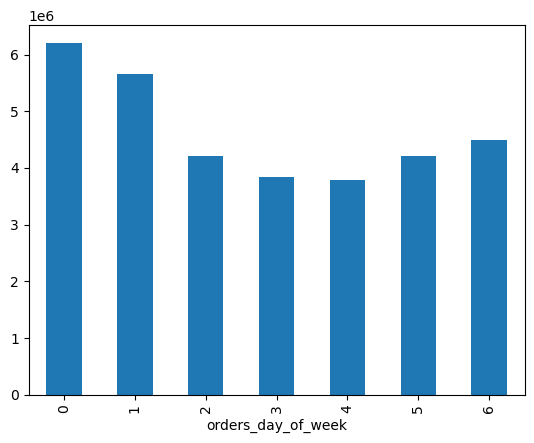

In [9]:
#Sorting bar chart by index

bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

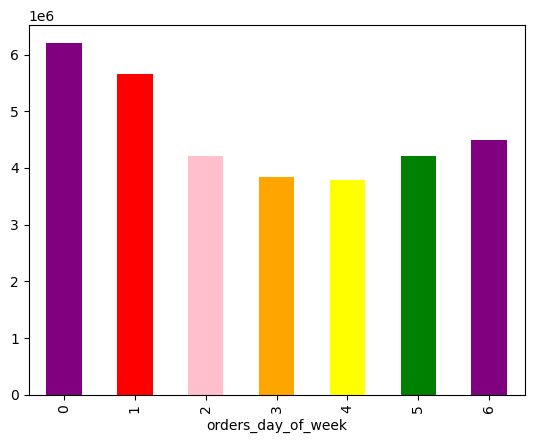

In [10]:
# Changing the color to the bar chart

bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color=['purple', 'red', 'pink', 'orange', 'yellow', 'green'])

In [11]:
# Exporting bar graph to folder

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

## Making Histograms

<Axes: ylabel='Frequency'>

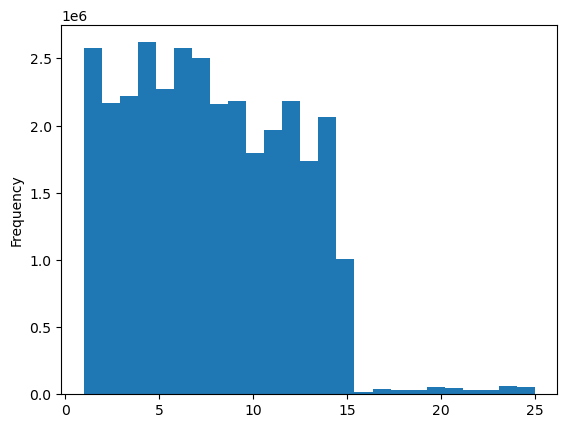

In [13]:
ords_prods_merge['prices'].plot.hist(bins = 25)

## Making scatter plots

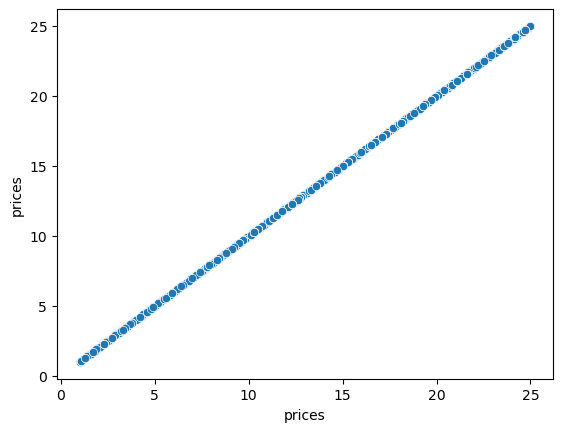

In [15]:
scatter = sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [56]:
scatter = scatter.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_price.png'))

## There was a misunderstanding with the achievements. In the 4.9 exercise, they demonstrated how bad data was able to leak into the data frame. Steps were provided to fix and remove this bad data. However, I happened to find it independently in achievement 4.7 and thought it was a missed step on my part. I was unaware cleaning the data would take place in this upcoming achievement 4.9. In previous exerises, I removed the data independently, which may be why the graphs look more accurate, even though they were intended to show the outliers. Sorry for any inconvenience. These next data removal checks will come up blank because the "bad data" had been removed by achievement 4.7

In [18]:
# Data cleaning scripts from exercise 4.9
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

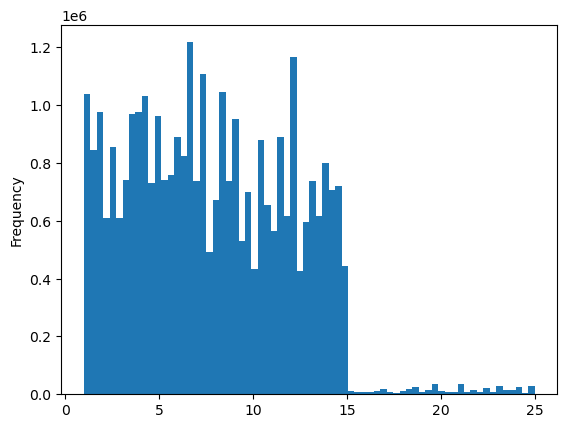

In [19]:
# 70 bin histogram
hist = ords_prods_merge['prices'].plot.hist(bins = 70)

In [20]:
# Exporting histogram graph to folder

hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices.png'))

## Sampling Data

In [22]:
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7


In [23]:
#Boolean returns whether it is or is not within the seed 4 
dev

array([False,  True, False, ...,  True,  True, False])

In [24]:
#Storing 70% of the sample into big
big = ords_prods_merge[dev]

#Storing the remaining 30% of hte sample into small
small = ords_prods_merge[~dev]


In [25]:
#Checking to see if the split was correct using the len() statement

len(ords_prods_merge)

32429085

In [26]:
#comparing it to big+small
len(big)+len(small)

# we can see they are equal, so it was done correctly

32429085

In [27]:
#Reducing the sample to only those columns necessary for the chart

df_2 = small[['orders_day_of_week','prices']]

## Line Graphs

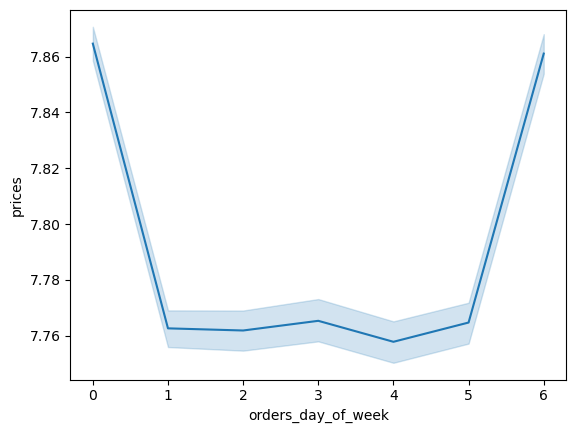

In [29]:
#Using df_2
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [30]:
# Saving the line graph

line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_price_dow.png'))